In [50]:
import pandas as pd
import numpy as np
import os

headers = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume(BTC)', 'Volume(Currency)', 'WeightedPrice']
data = pd.DataFrame(columns=headers)

for filename in os.listdir('../datasets/bitcoin-5')[:10]:
    data = pd.concat([data, pd.read_csv(f'../datasets/bitcoin-5/{filename}', index_col=False)])
    print(filename)
    
data['Change'] = data['Open'] - data['Close']
data['PerChange'] = (data['Open'] - data['Close'])/data['WeightedPrice']

changes = np.round(np.array(data['PerChange']), 4)

def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

IN = 15
OUT = 1

X, y = split_sequence(changes, IN, OUT)

2020-06-01.csv
2020-06-02.csv
2020-06-03.csv
2020-06-04.csv
2020-06-05.csv
2020-06-06.csv
2020-06-07.csv
2020-06-08.csv
2020-06-09.csv
2020-06-10.csv


In [51]:
def find_similar(X, y):
    
    sims = {}
    
    for i in range(int(len(X)/5)):
        
        pX = np.delete(X, i, axis=0)
        pY = np.delete(y, i, axis=0)
                   
        new = [X[i] * -1 for x in range(len(pX))]

        summed = np.sum(pX + new, axis=1)
        
        if len(pY[summed == 0]) > 0:
                   
            sims.update({i: ((sum(pY[summed == 0]) + y[i])/len(pY[summed == 0]), len(pY[summed == 0]))}) 
            
            
        if i % 100 is 0:
            print(i)
            
    return sims

In [52]:
s = find_similar(X, y)

0
100
200
300
400
500


count    482.000000
mean       0.000042
std        0.001857
min       -0.006000
25%       -0.000430
50%        0.000000
75%        0.000400
max        0.031750
dtype: float64


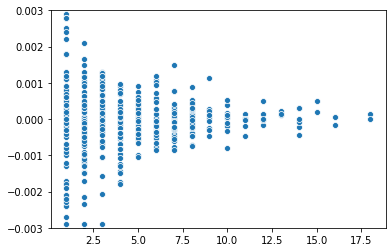

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

vals = [s[0][0] for s in s.values()]
nums = [s[1] for s in s.values()]
print(pd.Series(vals).describe())

plt.ylim(-0.003, 0.003)
sns.scatterplot(x=nums, y=vals)

In [37]:
np.array(data)

array([[1590883200, 9699.9, 9700.0, ..., 9689.78128584571,
        24.100000000000364, 0.0024871562411015713],
       [1590883500, 9673.3, 9683.6, ..., 9674.250491678158,
        6.599999999998545, 0.0006822233934996721],
       [1590883800, 9664.6, 9679.0, ..., 9666.409296915699,
        10.600000000000364, 0.0010965809200095167],
       ...,
       [1591746600, 9775.5, 9775.8, ..., 9770.745854014549, 10.5,
        0.001074636487007368],
       [1591746900, 9763.4, 9778.0, ..., 9772.351492516837,
        -14.600000000000364, -0.0014940109359738332],
       [1591747200, 9778.0, 9779.6, ..., 9771.408589021272,
        10.799999999999272, 0.0011052654181438776]], dtype=object)